# GMU ECE 527 - Computer Exercise #3 - Code
**Stewart Schuler - G01395779**\
**20240919**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

np.random.seed(5779)

In [2]:
#
# Plot the decision function for a classifier clf
#    Optional argument, SV, if set to 1 will plot the support vectors
#    For data sets with many support vectors, it is best to keep SV=0
#
def plot_classifier(X,y,sv=0):   #Default value sv=0: Do not show vectors
    data = pd.DataFrame(X,columns=["x1","x2"])
    sns.scatterplot(x="x1", y="x2", data=data, hue=y, palette=['red','blue'])
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
    # plot support vectors
    if(sv==1):
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')


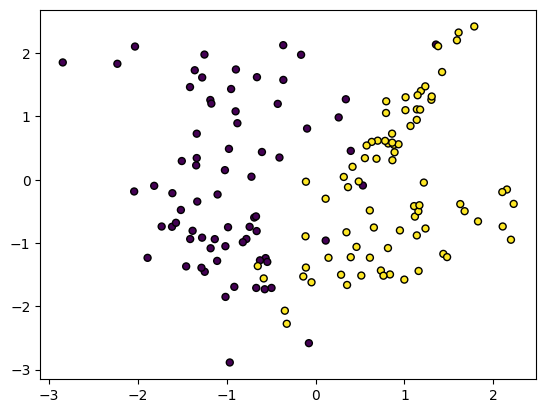

In [3]:
from sklearn.datasets import make_classification
#Input the last thee numbers of your GMU G-Number for the random_state
X, y = make_classification(n_features=2, n_samples=200,n_redundant=0, n_informative=2,
                           n_clusters_per_class=2,class_sep=1,random_state=139)   
X_train,X_test,y_train,y_test=train_test_split(X, y)
plt.scatter(X_train[:,0],X_train[:,1],marker="o",c=y_train,s=25,edgecolor="k")

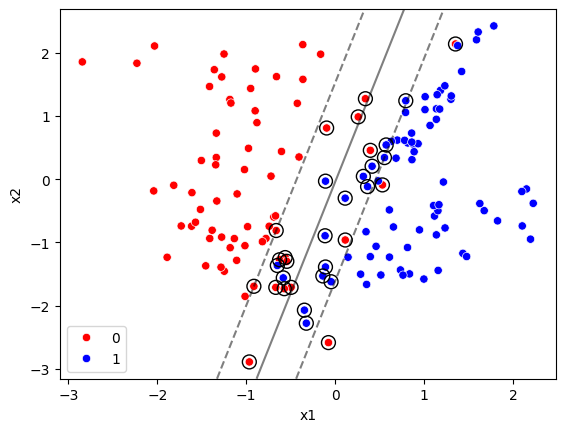

In [4]:
clf = SVC(kernel='linear')    # Default value of C=1
clf.fit(X_train, y_train)
plot_classifier(X_train,y_train,sv=1)

In [5]:
print(f"Score All: {clf.score(X,y)}")
print(f"Score Train: {clf.score(X_train,y_train)}")
print(f"Score Test: {clf.score(X_test,y_test)}")


Score All: 0.95
Score Train: 0.9466666666666667
Score Test: 0.96


**Changing C**

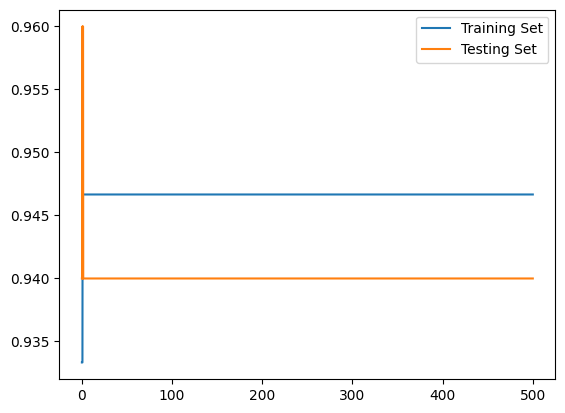

In [6]:
N_C = 5000
c_axis = np.zeros((N_C))
tr_score = np.zeros((N_C))
te_score = np.zeros((N_C))
for c_idx in range(N_C):
    c_val = (c_idx+1)/10
    clf_c = SVC(kernel='linear', C=c_val)
    clf_c.fit(X_train, y_train)
    c_axis[c_idx] = c_val
    tr_score[c_idx] = clf_c.score(X_train,y_train)
    te_score[c_idx] = clf_c.score(X_test, y_test )

plt.plot( c_axis, tr_score, label="Training Set")
plt.plot( c_axis, te_score, label="Testing Set")
plt.legend()

In [7]:
print(f"Number of support vectors: {clf.n_support_}")
print(clf.dual_coef_)
print(clf.dual_coef_.shape)

Number of support vectors: [17 16]
[[-1.         -0.01279677 -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -0.31552129 -1.         -1.
  -1.         -1.         -1.         -1.         -1.          1.
   1.          1.          1.          1.          0.32831806  1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.        ]]
(1, 33)


**Poly Classification**

Score All: 0.915
Score Train: 0.9133333333333333
Score Test: 0.92
Number of support vectors: [30 30]


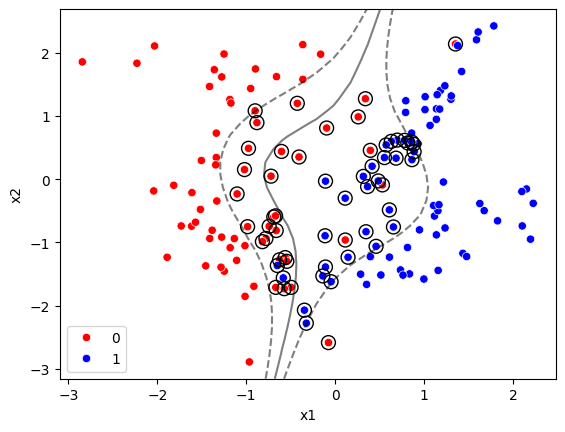

In [8]:
clf = SVC(kernel='poly')    # Default value of C=1
clf.fit(X_train, y_train)
plot_classifier(X_train,y_train,sv=1)
print(f"Score All: {clf.score(X,y)}")
print(f"Score Train: {clf.score(X_train,y_train)}")
print(f"Score Test: {clf.score(X_test,y_test)}")
print(f"Number of support vectors: {clf.n_support_}")

(2) Score All: 0.94
(2) Score Train: 0.94
(2) Score Test: 0.94
(2) Number of support vectors: [14 12]
(3) Score All: 0.95
(3) Score Train: 0.9466666666666667
(3) Score Test: 0.96
(3) Number of support vectors: [12 12]
(4) Score All: 0.95
(4) Score Train: 0.9466666666666667
(4) Score Test: 0.96
(4) Number of support vectors: [11 12]
(5) Score All: 0.945
(5) Score Train: 0.94
(5) Score Test: 0.96
(5) Number of support vectors: [11 12]


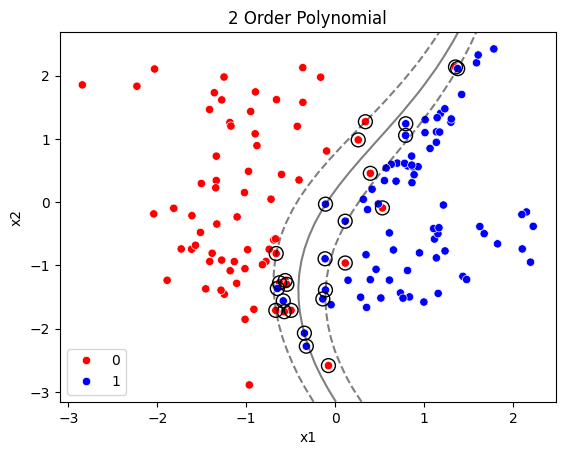

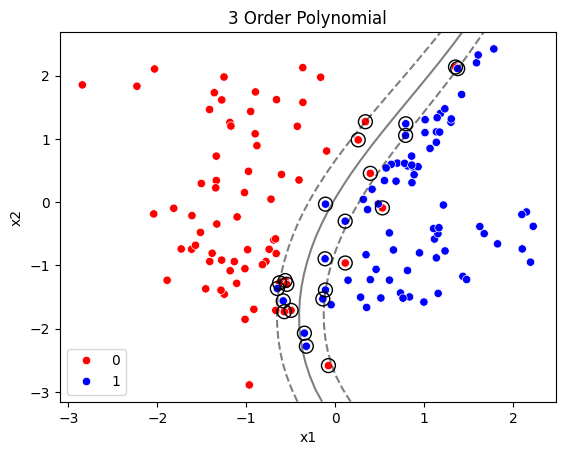

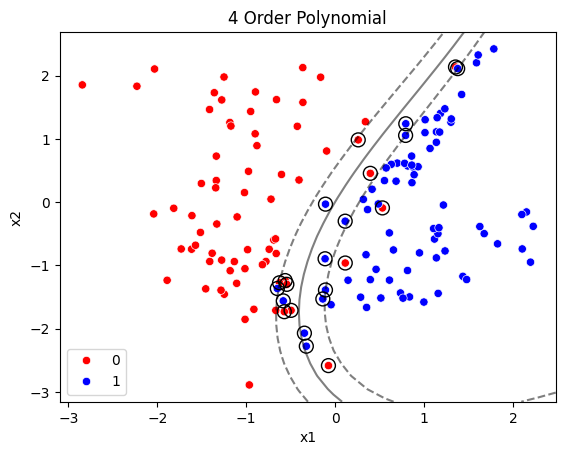

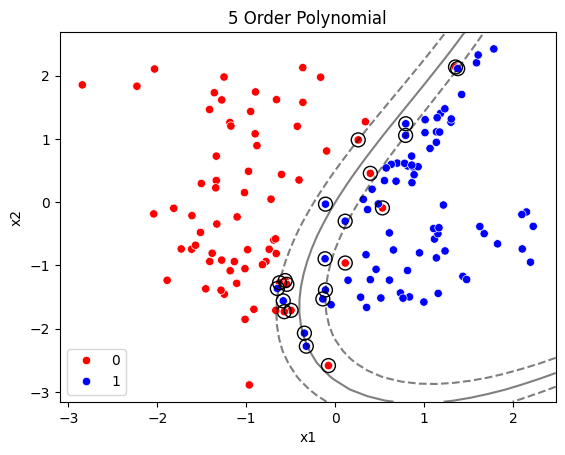

In [9]:
for poly_coef in [ 2,3,4,5 ]:
    clf = SVC(kernel='poly', coef0=poly_coef)    # Default value of C=1
    clf.fit(X_train, y_train)
    plt.figure()
    plot_classifier(X_train,y_train,sv=1)
    plt.title(f"{poly_coef} Order Polynomial")
    print(f"({poly_coef}) Score All: {clf.score(X,y)}")
    print(f"({poly_coef}) Score Train: {clf.score(X_train,y_train)}")
    print(f"({poly_coef}) Score Test: {clf.score(X_test,y_test)}")
    print(f"({poly_coef}) Number of support vectors: {clf.n_support_}")

Auto Gamma = 0.5
(auto) Score All: 0.945
(auto) Score Train: 0.9466666666666667
(auto) Score Test: 0.94
(auto) Number of support vectors: [21 20]
Auto Gamma = 0.3710461455836932
(scale) Score All: 0.945
(scale) Score Train: 0.9466666666666667
(scale) Score Test: 0.94
(scale) Number of support vectors: [20 20]


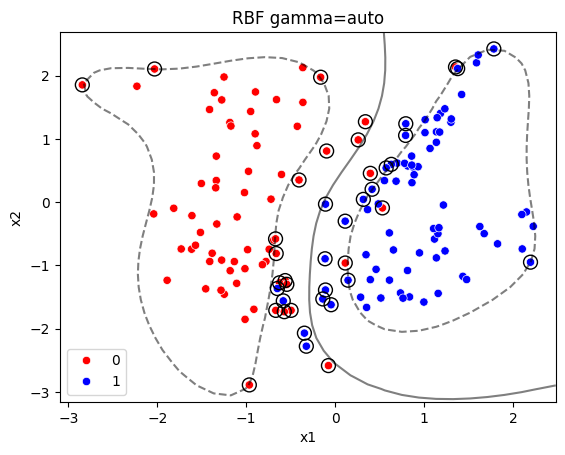

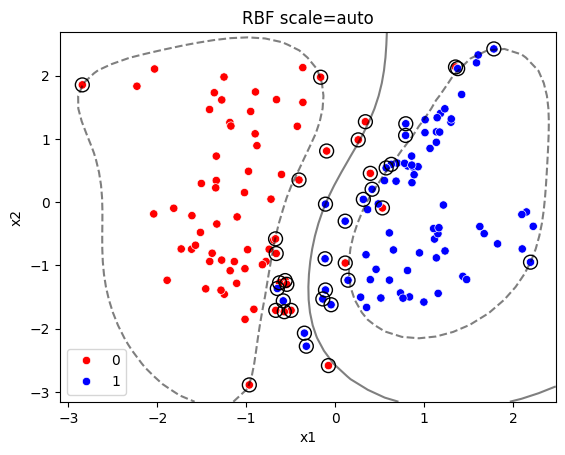

In [10]:

clf = SVC(kernel='rbf', gamma='auto')   
clf.fit(X_train, y_train)
plt.figure()
plot_classifier(X_train,y_train,sv=1)
plt.title(f"RBF gamma=auto")
print(f"Auto Gamma = {1/X_train.shape[1]}")
print(f"(auto) Score All: {clf.score(X,y)}")
print(f"(auto) Score Train: {clf.score(X_train,y_train)}")
print(f"(auto) Score Test: {clf.score(X_test,y_test)}")
print(f"(auto) Number of support vectors: {clf.n_support_}")

clf = SVC(kernel='rbf', gamma='scale')   
clf.fit(X_train, y_train)
plt.figure()
plot_classifier(X_train,y_train,sv=1)
plt.title(f"RBF scale=auto")
print(f"Auto Gamma = {1/(X_train.shape[1]*X_train.var())}")
print(f"(scale) Score All: {clf.score(X,y)}")
print(f"(scale) Score Train: {clf.score(X_train,y_train)}")
print(f"(scale) Score Test: {clf.score(X_test,y_test)}")
print(f"(scale) Number of support vectors: {clf.n_support_}")

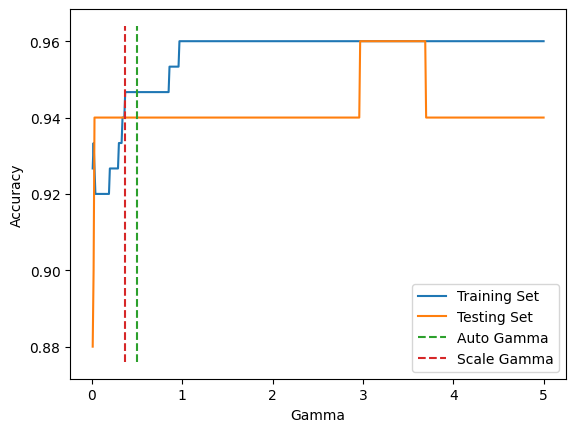

In [11]:
N_G = 500
g_axis = np.zeros((N_G))
tr_score = np.zeros((N_G))
te_score = np.zeros((N_G))
for g_idx in range(N_G):
    g_val = (g_idx+1)/100
    clf_c = SVC(kernel='rbf', gamma = g_val)
    clf_c.fit(X_train, y_train)
    g_axis[g_idx] = g_val
    tr_score[g_idx] = clf_c.score(X_train,y_train)
    te_score[g_idx] = clf_c.score(X_test, y_test )

plt.plot( g_axis, tr_score, label="Training Set")
plt.plot( g_axis, te_score, label="Testing Set")

y_bound = plt.gca().get_ylim()
x_bount = plt.gca().get_xlim()

plt.plot( [1/X_train.shape[1], 1/X_train.shape[1] ], y_bound, '--', label='Auto Gamma')
plt.plot( [1/(X_train.shape[1]*X_train.var()), 1/(X_train.shape[1]*X_train.var()) ], y_bound, '--', label='Scale Gamma')
plt.ylabel("Accuracy")
plt.xlabel("Gamma")
plt.legend()

## Exercise 3.2

(569, 30)
(569,)
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Text(0, 0.5, 'log10(var)')

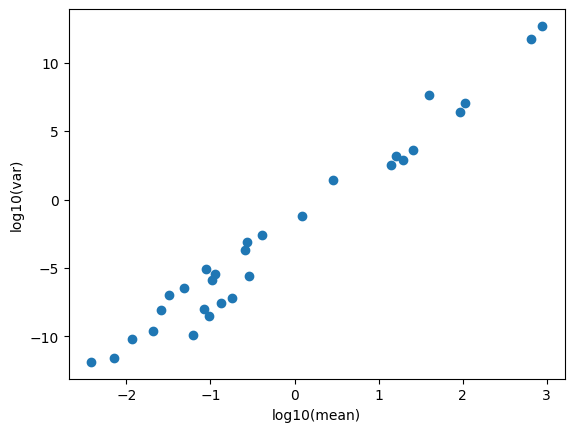

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print(X.shape)
print(y.shape)
print("Feature names:\n{}".format(cancer.feature_names))

mean = X.mean(axis=0)
var = X.var(axis=0)

plt.scatter(np.log10(mean),np.log(var))
plt.xlabel('log10(mean)')
plt.ylabel('log10(var)')

**Split and scale**

Text(0, 0.5, 'var')

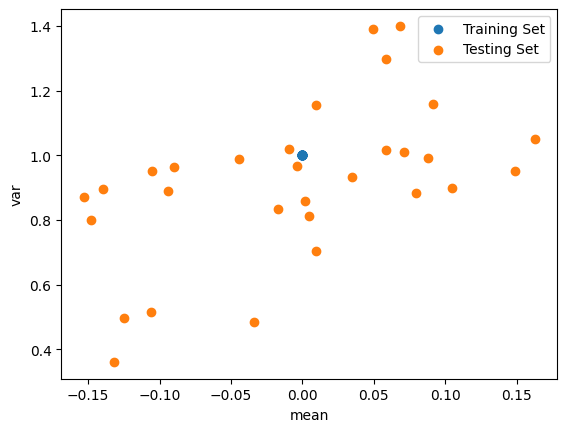

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X, y)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mean_tr = X_train.mean(axis=0)
var_tr = X_train.var(axis=0)
mean_te = X_test.mean(axis=0)
var_te = X_test.var(axis=0)
plt.scatter((mean_tr),(var_tr), label="Training Set")
plt.scatter((mean_te),(var_te), label="Testing Set")
plt.legend()
plt.xlabel('mean')
plt.ylabel('var')

In [14]:
for c_val in [0.01, 0.1, 1, 10, 100 ]:
    clf = SVC(kernel='linear', C=c_val)
    clf.fit(X_train, y_train)
    print(f"(C={c_val}) (Train) Linear Score = {clf.score(X_train,y_train)}")
    print(f"(C={c_val}) (Test) Linear Score = {clf.score(X_test,y_test)}")
    print( clf.n_support_)


(C=0.01) (Train) Linear Score = 0.9671361502347418
(C=0.01) (Test) Linear Score = 0.9790209790209791
[52 50]
(C=0.1) (Train) Linear Score = 0.9812206572769953
(C=0.1) (Test) Linear Score = 0.9790209790209791
[27 27]
(C=1) (Train) Linear Score = 0.9882629107981221
(C=1) (Test) Linear Score = 0.986013986013986
[17 18]
(C=10) (Train) Linear Score = 0.9882629107981221
(C=10) (Test) Linear Score = 0.986013986013986
[16 16]
(C=100) (Train) Linear Score = 0.9953051643192489
(C=100) (Test) Linear Score = 0.9790209790209791
[13 16]


In [15]:
clf = SVC(kernel='rbf', gamma = 'auto')
clf.fit(X_train, y_train)
print(f"Gamma Val: {1/(X.shape[1])}")
print(f"({clf.gamma}) (Train) Linear Score = {clf.score(X_train,y_train)}")
print(f"({clf.gamma}) (Test) Linear Score = {clf.score(X_test,y_test)}")

clf = SVC(kernel='rbf', gamma = 'scale')
clf.fit(X_train, y_train)
print(f"Gamma Val: {1/(X_train.shape[1]*X_train.var())}")
print(f"({clf.gamma}) (Train) Linear Score = {clf.score(X_train,y_train)}")
print(f"({clf.gamma}) (Test) Linear Score = {clf.score(X_test,y_test)}")




Gamma Val: 0.03333333333333333
(auto) (Train) Linear Score = 0.9859154929577465
(auto) (Test) Linear Score = 0.972027972027972
Gamma Val: 0.03333333333333333
(scale) (Train) Linear Score = 0.9859154929577465
(scale) (Test) Linear Score = 0.972027972027972


Auto 0.03333333333333333
Scale 0.03333333333333333


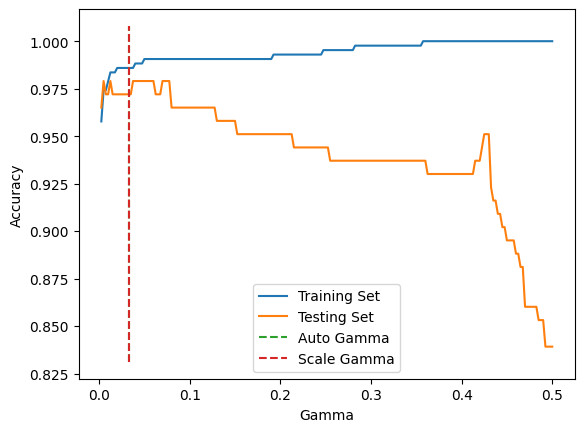

In [16]:
N_G = 200
g_axis = np.zeros((N_G))
tr_score = np.zeros((N_G))
te_score = np.zeros((N_G))
for g_idx in range(N_G):
    g_val = (g_idx+1)/400
    clf_g = SVC(kernel='rbf', gamma = g_val)
    clf_g.fit(X_train, y_train)
    g_axis[g_idx] = clf_g.gamma
    tr_score[g_idx] = clf_g.score(X_train,y_train)
    te_score[g_idx] = clf_g.score(X_test, y_test )

plt.plot( g_axis, tr_score, label="Training Set")
plt.plot( g_axis, te_score, label="Testing Set")

y_bound = plt.gca().get_ylim()
x_bount = plt.gca().get_xlim()
print(f"Auto {1/(X_train.shape[1])}")
plt.plot( [1/X_train.shape[1], 1/X_train.shape[1] ], y_bound, '--', label='Auto Gamma')
print(f"Scale {1/(X_train.shape[1]*X_train.var())}")
plt.plot( [1/(X_train.shape[1]*X_train.var()), 1/(X_train.shape[1]*X_train.var()) ], y_bound, '--', label='Scale Gamma')
plt.ylabel("Accuracy")
plt.xlabel("Gamma")
plt.legend()

(C=0.01) (Train) Linear Score = 0.5093896713615024
(C=0.01) (Test) Linear Score = 0.5804195804195804
[94 94]
(569, 2)
(C=0.1) (Train) Linear Score = 0.5093896713615024
(C=0.1) (Test) Linear Score = 0.5664335664335665
[49 49]
(569, 2)
(C=1) (Train) Linear Score = 0.5023474178403756
(C=1) (Test) Linear Score = 0.5664335664335665
[33 33]
(569, 2)
(C=10) (Train) Linear Score = 0.5046948356807511
(C=10) (Test) Linear Score = 0.5594405594405595
[29 29]
(569, 2)
(C=100) (Train) Linear Score = 0.5046948356807511
(C=100) (Test) Linear Score = 0.5594405594405595
[29 28]
(569, 2)


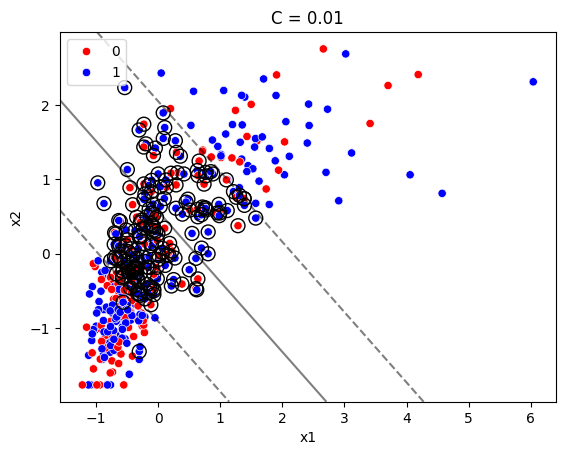

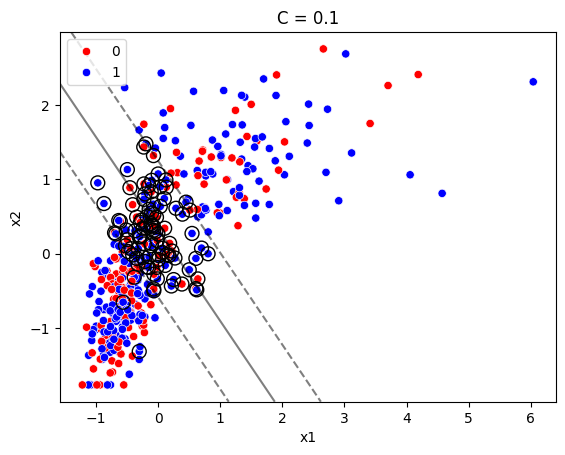

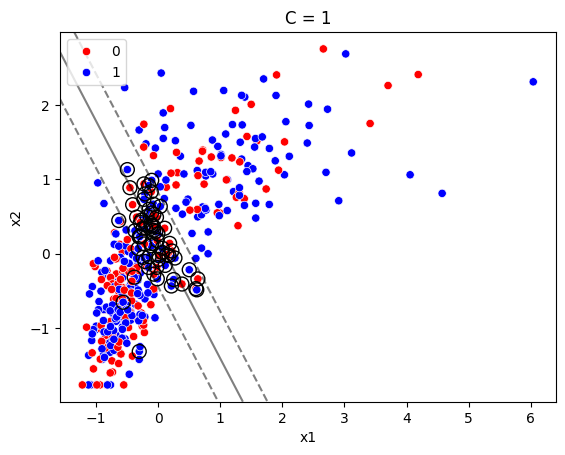

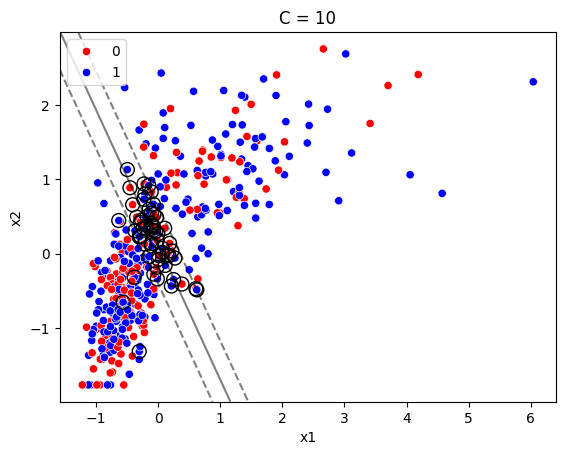

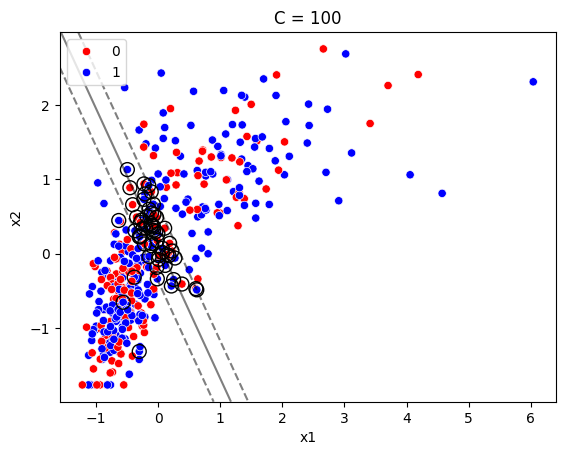

In [17]:
X2 = np.column_stack((X[:,[23]],X[:,[27]]))

X2_train,X2_test,y2_train,y2_test=train_test_split(X2, y)

scaler = StandardScaler()
scaler.fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)

for c_val in [0.01, 0.1, 1, 10, 100 ]:
    clf = SVC(kernel='linear', C=c_val)
    clf.fit(X2_train, y2_train)
    print(f"(C={c_val}) (Train) Linear Score = {clf.score(X2_train,y_train)}")
    print(f"(C={c_val}) (Test) Linear Score = {clf.score(X2_test,y_test)}")
    print( clf.n_support_)
    plt.figure()
    print(X2.shape)
    plot_classifier(X2_train,y_train,sv=1)
    plt.title(f"C = {c_val}")